In [1]:
from plot import *
import matplotlib.pyplot as plt

['IPPO/2024-06-18_230048', 'SIPPO/2024-06-18_230045']


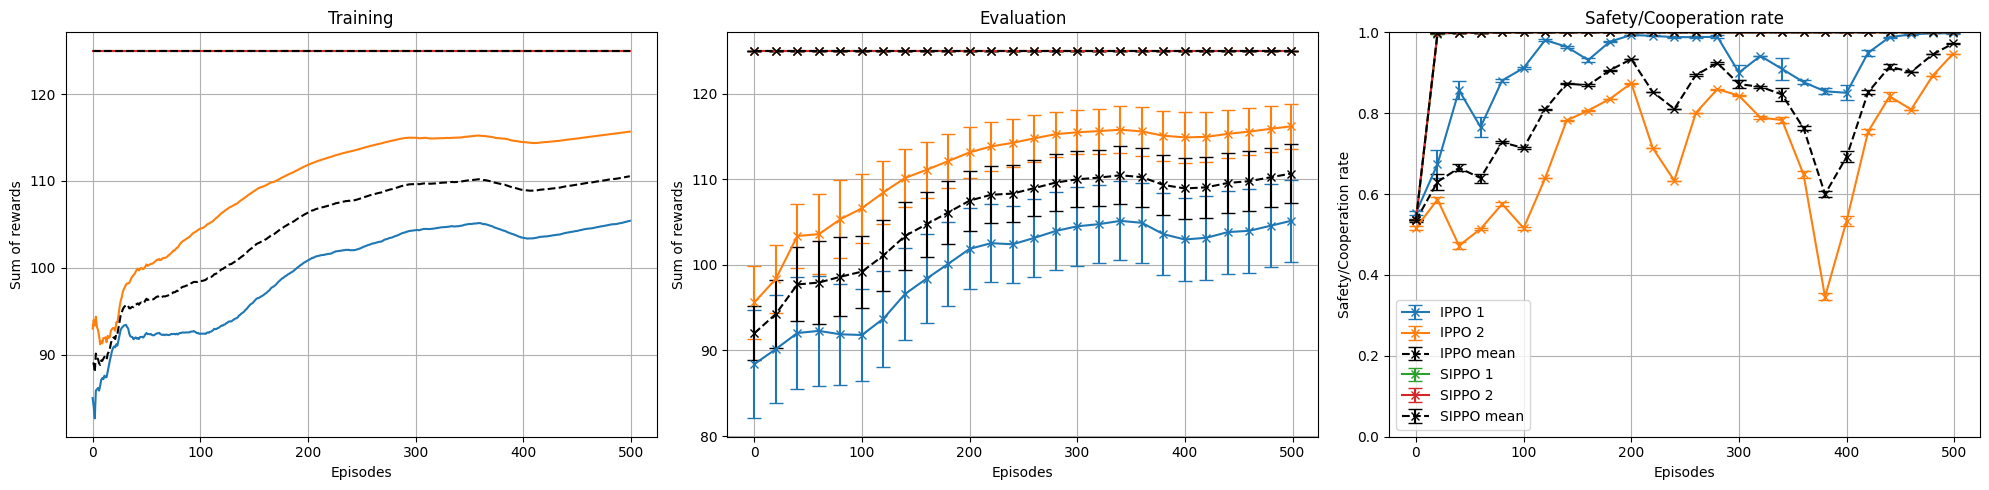

In [7]:
base = "../histories/publicgoods"
files = {"IPPO": ["2024-06-18_223353"], "SIPPO":["2024-06-18_224034"]} # f=0.5
files = {"IPPO": ["2024-06-18_224737"], "SIPPO":["2024-06-18_224846"]} # f=1
files = {"IPPO": ["2024-06-18_225300"], "SIPPO":["2024-06-18_225256"]} # f=1.5
files = {"IPPO": ["2024-06-18_225704"], "SIPPO":["2024-06-18_225700"]} # f=2
files = {"IPPO": ["2024-06-18_230048"], "SIPPO":["2024-06-18_230045"]} # f=2.5

algo_filenames = [k+"/"+v for k, vs in files.items() for v in vs]
print(algo_filenames)
labels = [r"player 1", r"player 2", r"mean"]

train_ax = plt.subplot(1, 3, 1)
eval_ax = plt.subplot(1, 3, 2)
safety_ax = plt.subplot(1, 3, 3)

# resize
plt.gcf().set_size_inches(20, 5)

for f,file in enumerate(algo_filenames):
    train, eval, safety, eval_eps = load_data(base, file, "all")
    plot_rewards_sum(train, train_ax, rolling_window="c")
    plot_eval_sum(eval, eval_eps, eval_ax, rolling_window="c")
    plot_eval_safety(safety, eval_eps, safety_ax, label=labels[f])    


train_ax.set_title("Training")
train_ax.set_xlabel("Episodes")
train_ax.set_ylabel("Sum of rewards")
train_ax.grid(True)

eval_ax.set_title("Evaluation")
eval_ax.set_xlabel("Episodes")
eval_ax.set_ylabel("Sum of rewards")
eval_ax.grid(True)

safety_ax.set_title("Safety/Cooperation rate")
safety_ax.set_xlabel("Episodes")
safety_ax.set_ylabel("Safety/Cooperation rate")
safety_ax.grid(True)
safety_ax.set_ylim(0, 1)
safety_ax.legend(labels=["IPPO 1", "IPPO 2", "IPPO mean", "SIPPO 1", "SIPPO 2", "SIPPO mean"])

plt.tight_layout()
plt.show()